In [1]:
import datetime
import numpy as np
import pandas as pd

C:\Users\00028263\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import geopandas as gpd

In [3]:
#Import data

input_path = r"C:\Users\00028263\Documents\04.Etc\personal\waterbodies\Train_data_v2.geojson"
train = gpd.read_file(input_path)
train.head()

C:\Users\00028263\AppData\Roaming\Python\Python310\site-packages\pyogrio\raw.py:198: RuntimeWarning: Several features with id = 1425 have been found. Altering it to be unique. This warning will not be emitted anymore for this layer
  return ogr_read(


,id,class,SAMPLE_1,SAMPLE_2,SAMPLE_3,SAMPLE_4,geometry
0,1425,1,0.0940,0.0799,0.0545,0.0569,POINT (709306.173 9286047.887)
1,1426,1,0.0948,0.0791,0.0531,0.0482,POINT (709300.797 9286053.086)
2,1427,1,0.0919,0.0727,0.0499,0.0449,POINT (709263.861 9286259.375)
3,1428,1,0.0926,0.0741,0.0509,0.0704,POINT (709296.699 9286283.207)
4,1429,1,0.0942,0.0756,0.0545,0.0941,POINT (709280.549 9286256.067)


In [4]:
#Clean data with nan

train_filter=train.dropna()
train_filter.head()

,id,class,SAMPLE_1,SAMPLE_2,SAMPLE_3,SAMPLE_4,geometry
0,1425,1,0.0940,0.0799,0.0545,0.0569,POINT (709306.173 9286047.887)
1,1426,1,0.0948,0.0791,0.0531,0.0482,POINT (709300.797 9286053.086)
2,1427,1,0.0919,0.0727,0.0499,0.0449,POINT (709263.861 9286259.375)
3,1428,1,0.0926,0.0741,0.0509,0.0704,POINT (709296.699 9286283.207)
4,1429,1,0.0942,0.0756,0.0545,0.0941,POINT (709280.549 9286256.067)


In [5]:
#rename columns

train_filter.rename(columns={'class': 'label', 'SAMPLE_1': 'B2', 'SAMPLE_2': 'B3','SAMPLE_3':'B4','SAMPLE_4':'B8'}, inplace=True)
train_filter.head()

,id,label,B2,B3,B4,B8,geometry
0,1425,1,0.0940,0.0799,0.0545,0.0569,POINT (709306.173 9286047.887)
1,1426,1,0.0948,0.0791,0.0531,0.0482,POINT (709300.797 9286053.086)
2,1427,1,0.0919,0.0727,0.0499,0.0449,POINT (709263.861 9286259.375)
3,1428,1,0.0926,0.0741,0.0509,0.0704,POINT (709296.699 9286283.207)
4,1429,1,0.0942,0.0756,0.0545,0.0941,POINT (709280.549 9286256.067)


In [7]:
train_sample=train_filter.groupby("label").sample(frac=0.5, random_state=1)
train_sample.head()

,id,label,B2,B3,B4,B8,geometry
391831,390695,0,0.0996,0.0883,0.0575,0.2682,POINT (697750.157 9291279.998)
26012,24782,0,0.1247,0.1114,0.1325,0.1703,POINT (708942.54 9292336.623)
502586,501453,0,0.1228,0.1071,0.1128,0.1277,POINT (700353.332 9300439.704)
15814,14574,0,0.1211,0.1114,0.1187,0.1587,POINT (701617.322 9300243.819)
350885,349735,0,0.1268,0.1102,0.1133,0.1564,POINT (698866.092 9291384.751)


In [8]:
#add new NDWI column

train_sample['NDWI']=(train_sample['B3'] - train_sample['B8']) / (train_sample['B3'] + train_sample['B8'])
train_sample.head(10)

,id,label,B2,B3,B4,B8,geometry,NDWI
391831,390695,0,0.0996,0.0883,0.0575,0.2682,POINT (697750.157 9291279.998),-0.504628
26012,24782,0,0.1247,0.1114,0.1325,0.1703,POINT (708942.54 9292336.623),-0.209088
502586,501453,0,0.1228,0.1071,0.1128,0.1277,POINT (700353.332 9300439.704),-0.087734
15814,14574,0,0.1211,0.1114,0.1187,0.1587,POINT (701617.322 9300243.819),-0.175120
350885,349735,0,0.1268,0.1102,0.1133,0.1564,POINT (698866.092 9291384.751),-0.173293
49075,47849,0,0.1132,0.0979,0.0768,0.2384,POINT (693181.213 9295528.985),-0.417782
483037,481903,0,0.1307,0.1234,0.1176,0.1528,POINT (699418.059 9286198.276),-0.106445
293371,292197,0,0.1287,0.1151,0.1171,0.1336,POINT (708215.226 9300249.465),-0.074387
525421,524288,0,0.1343,0.1171,0.1109,0.1703,POINT (709584.097 9292288.619),-0.185108
278357,277180,0,0.1174,0.1047,0.1113,0.1719,POINT (697656.483 9298776.997),-0.242950



Boxplots for features by class:


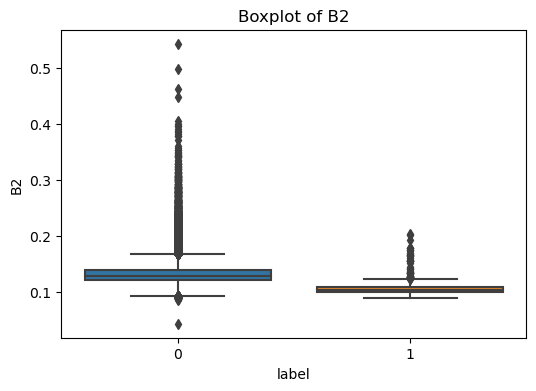

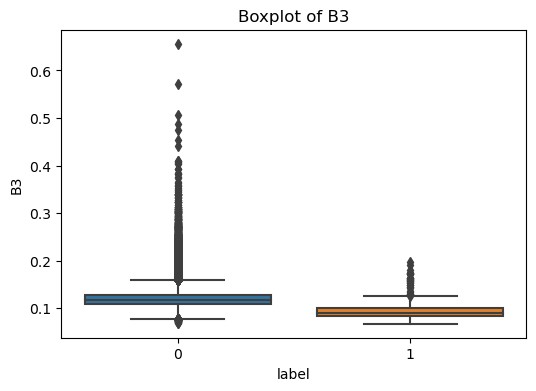

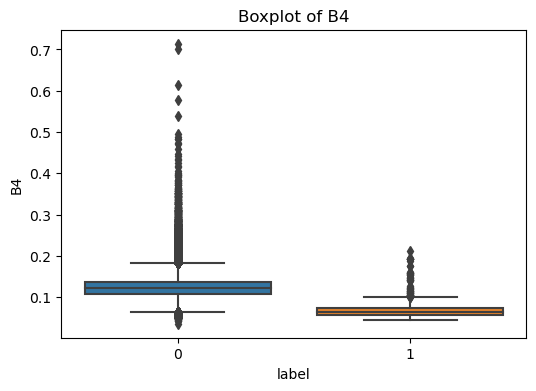

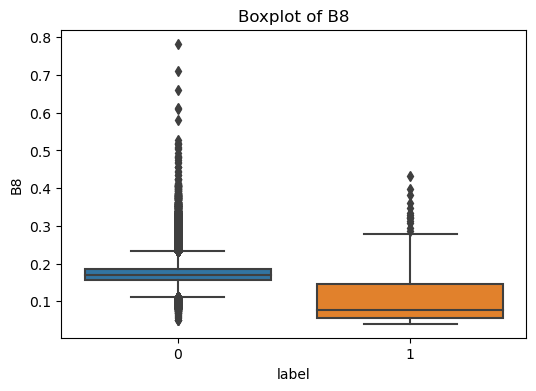

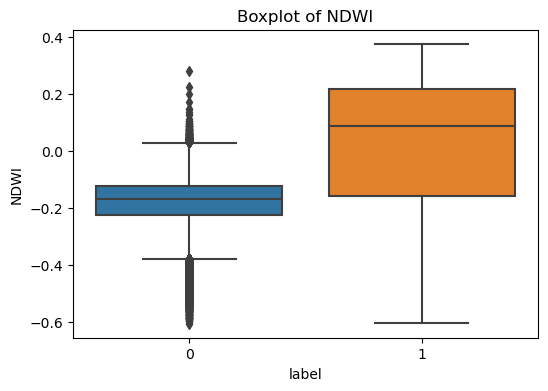

In [42]:
# Create Boxplots for each column by class
print("\nBoxplots for features by class:")
categorical_columns=['label']
for num_col in train_sample.select_dtypes(include=['int64', 'float64']).columns:
    for cat_col in categorical_columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=cat_col, y=num_col, data=train_sample)
        plt.title(f'Boxplot of {num_col}')
        plt.show()

In [19]:
test_path = r"C:\Users\00028263\Documents\04.Etc\personal\waterbodies\Test_data_v2.geojson"
test = gpd.read_file(test_path)
test.head()

C:\Users\00028263\AppData\Roaming\Python\Python310\site-packages\pyogrio\raw.py:198: RuntimeWarning: Several features with id = 260 have been found. Altering it to be unique. This warning will not be emitted anymore for this layer
  return ogr_read(


,id,class,SAMPLE_1,SAMPLE_2,SAMPLE_3,SAMPLE_4,geometry
0,0,0,0.1225,0.1065,0.0954,0.1526,POINT (691868.773 9283317.988)
1,1,0,0.1632,0.1438,0.1419,0.1707,POINT (696270.84 9282654.239)
2,2,0,0.1015,0.0908,0.0691,0.2219,POINT (696271.763 9282547.116)
3,3,0,0.1367,0.1286,0.1331,0.1961,POINT (696243.294 9282502.344)
4,4,0,0.1198,0.1098,0.1105,0.1553,POINT (696229.416 9282492.143)


In [20]:
#rename columns

test.rename(columns={'class': 'label', 'SAMPLE_1': 'B2', 'SAMPLE_2': 'B3','SAMPLE_3':'B4','SAMPLE_4':'B8'}, inplace=True)
test['NDWI']=(test['B3'] - test['B8']) / (test['B3'] + test['B8'])
test.head()

,id,label,B2,B3,B4,B8,geometry,NDWI
0,0,0,0.1225,0.1065,0.0954,0.1526,POINT (691868.773 9283317.988),-0.177924
1,1,0,0.1632,0.1438,0.1419,0.1707,POINT (696270.84 9282654.239),-0.085533
2,2,0,0.1015,0.0908,0.0691,0.2219,POINT (696271.763 9282547.116),-0.419252
3,3,0,0.1367,0.1286,0.1331,0.1961,POINT (696243.294 9282502.344),-0.207884
4,4,0,0.1198,0.1098,0.1105,0.1553,POINT (696229.416 9282492.143),-0.171633


In [18]:
#Clean data with nan
test.fillna(0, inplace=True)
test.head()

,label,B2,B3,B4,B8,geometry,NDWI
0,0.0,0.0,0.0,0.0,0.0,POINT (83.87799 28.29347),0.0
1,0.0,0.0,0.0,0.0,0.0,POINT (83.87808 28.29347),0.0
2,0.0,0.0,0.0,0.0,0.0,POINT (83.87817 28.29347),0.0
3,0.0,0.0,0.0,0.0,0.0,POINT (83.87826 28.29347),0.0
4,0.0,0.0,0.0,0.0,0.0,POINT (83.87835 28.29347),0.0


In [21]:
#Split x and Y features

X_train=train_sample[['B2','B3','B4','B8','NDWI']]
y_train=train_sample['label']
X_test=test[['B2','B3','B4','B8','NDWI']]
y_test=test['label']

In [22]:
from sklearn.ensemble import RandomForestClassifier
# create model instance
rf = RandomForestClassifier()
# fit model
rf.fit(X_train, y_train)
# make predictions
y_pred = rf.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

cv_results = cross_validate(rf, X_train, y_train, cv=5)
cv_results['test_score']

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
acc=accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred, average='macro')
print(f'Accuracy: {acc}')
print(f'F1 Score: {f1}')

Accuracy: 0.9988256406196395
F1 Score: 0.8566189897995992


In [24]:
test_w2w_path = r"C:\Users\00028263\Documents\04.Etc\personal\waterbodies\Test_data_w2w.geojson"
test_w2w = gpd.read_file(test_w2w_path)
test_w2w.head()

,SAMPLE_1,SAMPLE_2,SAMPLE_3,SAMPLE_4,geometry
0,0.0000,0.0000,0.0000,0.0000,POINT (683583.716 9291535.982)
1,0.0000,0.0000,0.0000,0.0000,POINT (683595.03 9291535.982)
2,0.0000,0.0000,0.0000,0.0000,POINT (683606.344 9291535.982)
3,0.0990,0.0871,0.0584,0.2779,POINT (683617.658 9291535.982)
4,0.0989,0.0884,0.0568,0.2711,POINT (683628.971 9291535.982)


In [25]:
#rename columns
test_w2w.rename(columns={'SAMPLE_1': 'B2', 'SAMPLE_2': 'B3','SAMPLE_3':'B4','SAMPLE_4':'B8'}, inplace=True)
test_w2w['NDWI']=(test['B3'] - test['B8']) / (test['B3'] + test['B8'])
test_w2w.head()

,B2,B3,B4,B8,geometry,NDWI
0,0.0000,0.0000,0.0000,0.0000,POINT (683583.716 9291535.982),-0.177924
1,0.0000,0.0000,0.0000,0.0000,POINT (683595.03 9291535.982),-0.085533
2,0.0000,0.0000,0.0000,0.0000,POINT (683606.344 9291535.982),-0.419252
3,0.0990,0.0871,0.0584,0.2779,POINT (683617.658 9291535.982),-0.207884
4,0.0989,0.0884,0.0568,0.2711,POINT (683628.971 9291535.982),-0.171633


In [27]:
from sklearn.ensemble import RandomForestClassifier

# make predictions
y_pred_w2w = rf.predict(test_w2w[['B2','B3','B4','B8','NDWI']])
pred_w2w=pd.DataFrame(y_pred_w2w)
pred_w2w

,0
0,1
1,1
2,1
3,0
4,0
...,...
2862495,0
2862496,0
2862497,0
2862498,0


In [29]:
pred_w2w['grid_id'] = pd.Series(range(1, len(pred_w2w) + 1))
pred_w2w.head()

,0,grid_id
0,1,1
1,1,2
2,1,3
3,0,4
4,0,5


In [30]:
test_w2w['grid_id'] = pd.Series(range(1, len(test_w2w) + 1))
test_w2w.head()

,B2,B3,B4,B8,geometry,NDWI,grid_id
0,0.0000,0.0000,0.0000,0.0000,POINT (683583.716 9291535.982),-0.177924,1
1,0.0000,0.0000,0.0000,0.0000,POINT (683595.03 9291535.982),-0.085533,2
2,0.0000,0.0000,0.0000,0.0000,POINT (683606.344 9291535.982),-0.419252,3
3,0.0990,0.0871,0.0584,0.2779,POINT (683617.658 9291535.982),-0.207884,4
4,0.0989,0.0884,0.0568,0.2711,POINT (683628.971 9291535.982),-0.171633,5


In [31]:
result = pd.merge(test_w2w,pred_w2w,on="grid_id")
result.rename(columns={0: 'pred'}, inplace=True)
result.head()

,B2,B3,B4,B8,geometry,NDWI,grid_id,pred
0,0.0000,0.0000,0.0000,0.0000,POINT (683583.716 9291535.982),-0.177924,1,1
1,0.0000,0.0000,0.0000,0.0000,POINT (683595.03 9291535.982),-0.085533,2,1
2,0.0000,0.0000,0.0000,0.0000,POINT (683606.344 9291535.982),-0.419252,3,1
3,0.0990,0.0871,0.0584,0.2779,POINT (683617.658 9291535.982),-0.207884,4,0
4,0.0989,0.0884,0.0568,0.2711,POINT (683628.971 9291535.982),-0.171633,5,0


In [32]:
# do this before sending to xarray
# to ensure extension is loaded
import rioxarray

# assuming your GeoDataFrame is called `gdf`
result["x"] = result.geometry.x
result["y"] = result.geometry.y

da = (
    result.set_index(["y", "x"])
    .pred
    .to_xarray()
)

da.rio.to_raster(r"C:\Users\00028263\Documents\04.Etc\personal\waterbodies\pred_data.tif")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 2499.5, 1144.5, -0.5)

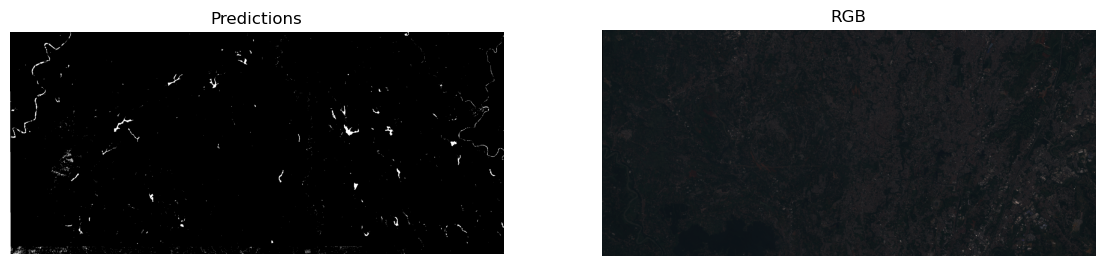

In [77]:
import rasterio
from matplotlib import pyplot as plt
from rasterio.plot import show
sat = rasterio.open(r"C:\Users\00028263\Documents\04.Etc\personal\waterbodies\test_sat.tif")
sat = rasterio.open(r"C:\Users\00028263\Documents\04.Etc\personal\waterbodies\test_sat.tif")

fig, (axcls, axrgb) = pyplot.subplots(1, 2, figsize=(14,7))
show(src, ax=axcls,cmap='gray')
show(sat.read([3,2,1]), ax=axrgb)
axcls.set_title('Predictions')
axcls.axis('off')
axrgb.set_title('RGB')
axrgb.axis('off')

In [ ]:
result.to_file(r"C:\Users\00028263\Documents\04.Etc\personal\waterbodies\pred_data.geojson", driver='GeoJSON')